In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

% matplotlib inline

In [2]:
df = pd.read_csv('../data/All_data_cbs.csv').drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [3]:
df.columns

Index([u'rowHash', u'Id', u'Title', u'Description', u'LikeCount',
       u'DislikeCount', u'ViewCount', u'FavoriteCount', u'CommentCount',
       u'PublishedAt', u'Channel Id', u'Channel Title', u'Lang',
       u'publishedAt', u'subscriberCount', u'channelVideoCount',
       u'channelViewCount', u'nextHash', u'PrevCommentCount',
       u'PrevDislikeCount', u'PrevLikeCount', u'PrevPublishedAt',
       u'PrevViewCount', u'PrevTitle', u'PublishedYear', u'ChannelAge',
       u'Title-clickbait', u'PrevTitle-clickbait'],
      dtype='object')

In [4]:
# Drop tinie tempah
df = df[(df['Channel Id'] != 'UCDSX4RQN7fzIlZ1nSubwCcQ')]

In [5]:
def top_k_percentile_views_mask(df, k):
    top_k_percent = df['ViewCount'].nlargest(int(df.shape[0] * (k / 100.))).iloc[-1]
    return df['ViewCount'] > top_k_percent

In [6]:
df['PublishedAt'] = pd.to_datetime(df['PublishedAt'], errors='coerce')
df['PrevPublishedAt'] = pd.to_datetime(df['PrevPublishedAt'], errors='coerce')
df.dropna()

,rowHash,Id,Title,Description,LikeCount,DislikeCount,ViewCount,FavoriteCount,CommentCount,PublishedAt,...,PrevCommentCount,PrevDislikeCount,PrevLikeCount,PrevPublishedAt,PrevViewCount,PrevTitle,PublishedYear,ChannelAge,Title-clickbait,PrevTitle-clickbait
0,0,Scp3JH3eVLw,Depeche Mode It's No Good,DANCA MUITO.,0,0,18,0,0,2017-06-25 19:12:16,...,0.0,2.0,14.0,2012-03-28 18:01:31,3911.0,the best of Jay cutler Dorian Yates,2017,2008,0.660503,0.782542
1,1,wLqmkz6u8G4,the best of Jay cutler Dorian Yates,Jay cutler e Dorian Yates,14,2,3911,0,0,2012-03-28 18:01:31,...,5.0,2.0,8.0,2010-08-23 16:12:50,3853.0,Iron Man Andy photos NO PAIN NO GAIN,2012,2008,0.782542,0.974470
2,2,nKMsh79uOcM,Iron Man Andy photos NO PAIN NO GAIN,Iron Man Andy muscle NO PAIN NO GAIN,8,2,3853,0,5,2010-08-23 16:12:50,...,0.0,2.0,3.0,2010-05-17 10:15:48,1392.0,the mission SEVERINA,2010,2008,0.974470,0.116492
3,4,E--7XtuuqAg,Mooring Anchor Carry 120kg at Papar Strongestm...,Only manage 11 meters,0,0,56,0,0,2016-10-10 15:07:16,...,0.0,0.0,0.0,2016-10-10 15:01:02,74.0,Tire Flip 450kg at Papar Strongestman 2016,2016,2011,0.323020,0.260023
4,5,fdsppIOelPw,Tire Flip 450kg at Papar Strongestman 2016,450kg x 5 flips,0,0,74,0,0,2016-10-10 15:01:02,...,0.0,0.0,0.0,2016-10-10 14:59:15,46.0,Farmer Walk 125kg each hand at Papar Strongest...,2016,2011,0.260023,0.141004
5,6,tJ3bb0V5y2Y,Farmer Walk 125kg each hand at Papar Strongest...,125kg x 2 for 40 meters,0,0,46,0,0,2016-10-10 14:59:15,...,0.0,0.0,0.0,2016-10-10 14:53:25,52.0,Truck Pull 14 tonnes at Papar Strongestman 2016,2016,2011,0.141004,0.572714
6,7,UYnmMwiNGUU,Truck Pull 14 tonnes at Papar Strongestman 2016,Almost 20 meters,0,0,52,0,0,2016-10-10 14:53:25,...,0.0,0.0,0.0,2016-10-10 14:51:32,31.0,Atlas Stone at Papar Strongestman 2016,2016,2011,0.572714,0.197839
7,8,3anYa8MAjvA,Atlas Stone at Papar Strongestman 2016,I manage carry up to 130kg stone,0,0,31,0,0,2016-10-10 14:51:32,...,0.0,0.0,1.0,2016-08-26 22:47:27,112.0,Deadlift 240kg Arnold Classic Asia Hong Kong,2016,2011,0.197839,0.451104
8,10,lT5lqT0zJgk,200kg Bench Press with support,Just wanna get the feel. My PR only 160 at the...,2,0,109,0,0,2016-03-02 08:17:23,...,0.0,0.0,0.0,2016-02-18 05:55:58,164.0,Farmer Walk 130kg Arnold Classic Australia,2016,2011,0.565735,0.113987
9,11,9qIULP6nY04,Farmer Walk 130kg Arnold Classic Australia,"Arnold Classic Australia Qualifier 2016, Victo...",0,0,164,0,0,2016-02-18 05:55:58,...,0.0,0.0,2.0,2015-11-24 08:19:52,99.0,Car Deadlift at Final Singapore Strongman 2015...,2016,2011,0.113987,0.037554


In [7]:
df['TimeDiff'] = pd.to_timedelta(df['PublishedAt']) - pd.to_timedelta(df['PrevPublishedAt'])

df = df[df['PrevViewCount'] > 0]
df['Views-PercentChange'] = (df['ViewCount'] - df['PrevViewCount']) / df['PrevViewCount'].astype(np.float)

In [8]:
# Drop some that have negative time diff values
df = df[df['TimeDiff'] > pd.Timedelta(0)]

In [9]:
df['Daysdiff'] = (df['TimeDiff'] / np.timedelta64(24, 'h')).astype(np.int)

In [10]:
df = df[df['ViewCount'] < 10000]

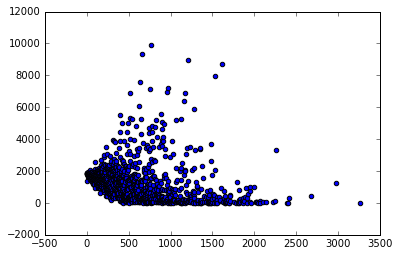

In [11]:
daysdiff_viewcount_mean = df.groupby('Daysdiff')['ViewCount'].mean()
plt.scatter(daysdiff_viewcount_mean.index, (daysdiff_viewcount_mean))

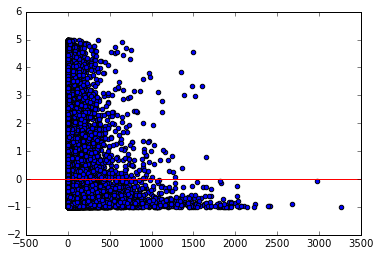

In [12]:
df_t = df[df['Views-PercentChange'] < 5]
plt.scatter(df_t['Daysdiff'], df_t['Views-PercentChange'])
plt.axhline(0, color='red')

# Looking at difference in clickbait scores

In [13]:
df['clickbait-difference'] = df['Title-clickbait'] - df['PrevTitle-clickbait']

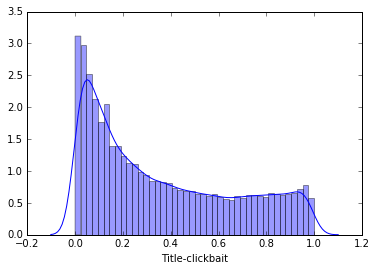

In [14]:
sns.distplot(df['Title-clickbait'])

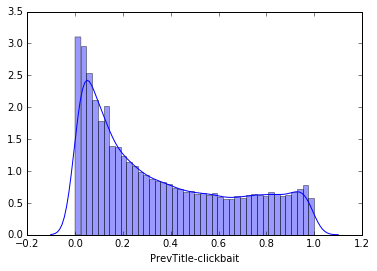

In [15]:
sns.distplot(df['PrevTitle-clickbait'])

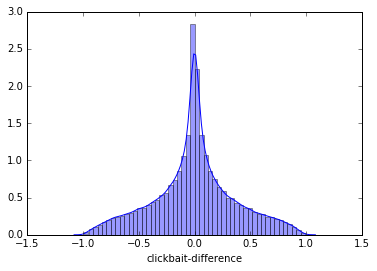

In [16]:
sns.distplot(df['clickbait-difference'])

This means that people typically don't change the "clickbaitiness" of their videos

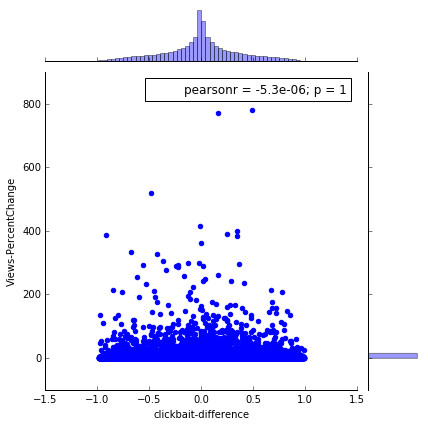

In [17]:
sns.jointplot(df['clickbait-difference'], df['Views-PercentChange'])

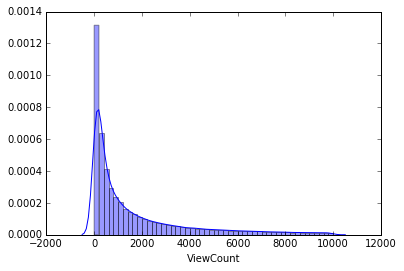

In [18]:
sns.distplot(df['ViewCount'])

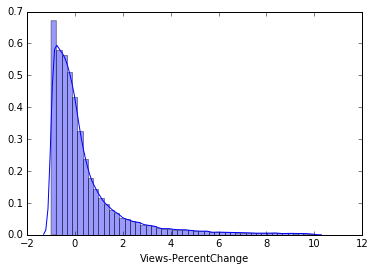

In [27]:
df = df[df['Views-PercentChange'] < 10]
sns.distplot(df['Views-PercentChange'])

In [380]:
df = pd.read_csv('../data/All_data_cbs.csv').drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

# Drop Tinie Tempah
df = df[(df['Channel Id'] != 'UCDSX4RQN7fzIlZ1nSubwCcQ')]

# Get the time difference
df['PublishedAt'] = pd.to_datetime(df['PublishedAt'], errors='coerce')
df['PrevPublishedAt'] = pd.to_datetime(df['PrevPublishedAt'], errors='coerce')
df['TimeDiff'] = pd.to_timedelta(df['PublishedAt']) - pd.to_timedelta(df['PrevPublishedAt'])

# Drop all samples that didn't have a previous video
df = df[df['PrevViewCount'] > 0]
df['Views-Difference'] = df['ViewCount'] - df['PrevViewCount']
df['Views-PercentChange'] = df['Views-Difference'] / df['PrevViewCount'].astype(np.float)
df.dropna()

# Drop some that have negative time diff values 
df = df[df['TimeDiff'] > pd.Timedelta(0)]

# Get the time difference in days
df['Daysdiff'] = (df['TimeDiff'] / np.timedelta64(24, 'h')).astype(np.int)

# Drop outliers
df = df[df['ViewCount'] < 1000000]
df = df[df['Views-PercentChange'] < 100]

# Get the difference in clickbait scores
df['clickbait-difference'] = df['Title-clickbait'] - df['PrevTitle-clickbait']

In [381]:
df.columns

Index([u'rowHash', u'Id', u'Title', u'Description', u'LikeCount',
       u'DislikeCount', u'ViewCount', u'FavoriteCount', u'CommentCount',
       u'PublishedAt', u'Channel Id', u'Channel Title', u'Lang',
       u'publishedAt', u'subscriberCount', u'channelVideoCount',
       u'channelViewCount', u'nextHash', u'PrevCommentCount',
       u'PrevDislikeCount', u'PrevLikeCount', u'PrevPublishedAt',
       u'PrevViewCount', u'PrevTitle', u'PublishedYear', u'ChannelAge',
       u'Title-clickbait', u'PrevTitle-clickbait', u'TimeDiff',
       u'Views-Difference', u'Views-PercentChange', u'Daysdiff',
       u'clickbait-difference'],
      dtype='object')

In [408]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

features = ['subscriberCount', 'channelVideoCount', 'channelViewCount',
            'PrevCommentCount', 'PrevDislikeCount', 'PrevLikeCount', 'PrevViewCount',
            'Title-clickbait', 'PrevTitle-clickbait', 'Daysdiff', 'clickbait-difference']

X = df[features]
#X = MinMaxScaler(feature_range=(0,1)).fit_transform(X)
#y = np.log1p(df['Views-PercentChange']+2)
y = df['Views-Difference']
#m = y.min()
#y = np.log1p(y - m + 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)
print "R^2: {0}".format(reg.score(X_test, y_test))

R^2: 0.915066543502


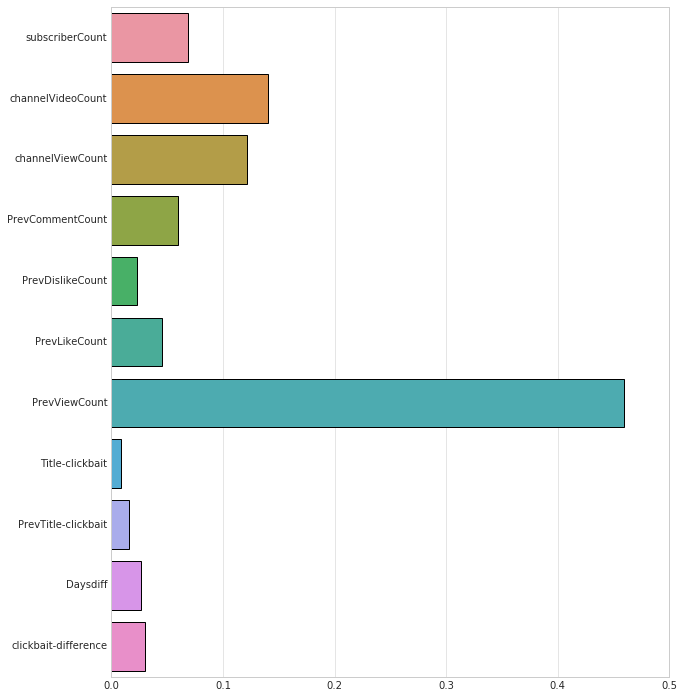

In [383]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,12))
sns.barplot(x=reg.feature_importances_, y=features)

In [384]:
xgb = XGBRegressor()

xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.91401129963477767

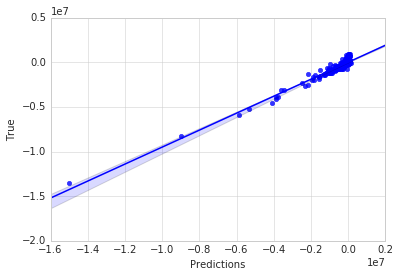

In [385]:
y_pred = xgb.predict(X_test)
plot_df = pd.DataFrame(y_pred, columns=['Predictions'])
plot_df['True'] = np.array(y_test)
sns.regplot(x='Predictions', y='True', data=plot_df)

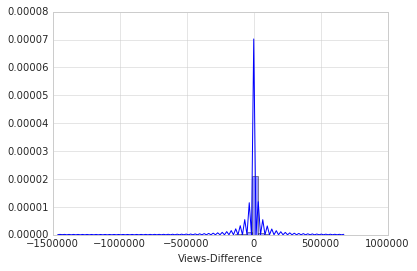

In [386]:
residuals = y_pred - y_test

sns.distplot(residuals)

The code above just showed us that we can very accurately predict the difference in views for specific cases - as in when we bound the TotalViews and when we bound the % change in views.

I think this is fair:
- The cases in which previous views > some bound is very unlikely. At that point there are a lot of factors out of our control that can affect their view counts
- You're unlikely to go viral (e.g. over 100x increase in views) just by what you put in title, description, thumbnail

Next we're going to create different models based on different bins.

In [320]:
num_bins = 1000
bins = pd.cut(df['PrevViewCount'], num_bins)
df['bin'] = bins

In [327]:
features = ['subscriberCount', 'channelVideoCount', 'channelViewCount',
            'PrevCommentCount', 'PrevDislikeCount', 'PrevLikeCount', #'PrevViewCount',
            'Title-clickbait', 'PrevTitle-clickbait', 'Daysdiff', 'clickbait-difference']

for bin in set(bins):
    df_t = df[df['bin'] == bin]
    if len(df_t) < 500:
        continue
    print "Processing " + bin

    X = df_t[features]
    y = df_t['Views-Difference']
    m = y.min()
    y = np.log1p(y + np.abs(m) + 1)
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    xgb = XGBRegressor(n_estimators=1000)
    xgb.fit(X_train, y_train)
    
    print xgb.score(X_test, y_test)


Processing (72951.252, 91188.815]
-0.171817766928
Processing (-18236.563, 18238.563]
0.10814946571
Processing (36476.126, 54713.689]
0.181761468329
Processing (18238.563, 36476.126]
0.0717811152953
Processing (54713.689, 72951.252]
0.185381464942


^ Essentially this means that binning was unsucessful..

In [410]:
features = ['subscriberCount', 'channelVideoCount', 'channelViewCount',
            'PrevCommentCount', 'PrevDislikeCount', 'PrevLikeCount', 'PrevViewCount',
            'Title-clickbait', 'PrevTitle-clickbait', 'Daysdiff', 'clickbait-difference']

X = df[features]
y = df[['ViewCount', 'Views-Difference']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [389]:
xgb_total = XGBRegressor()
xgb_total.fit(X_train, y_train['ViewCount'])
xgb_total.score(X_test, y_test['ViewCount'])

0.41744529064955038

In [390]:
xgb_diff = XGBRegressor()
xgb_diff.fit(X_train, y_train['Views-Difference'])
xgb_diff.score(X_test, y_test['Views-Difference'])

0.88517971177429466

For some reason, it can't predict the ViewCount but it can predict the difference in views.

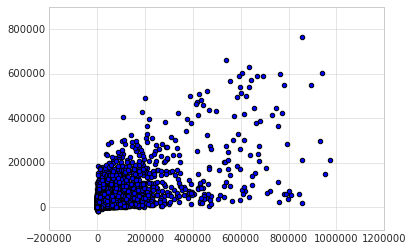

In [418]:
y_pred = xgb_total.predict(X_test)
plt.scatter(y_test['ViewCount'], y_pred)

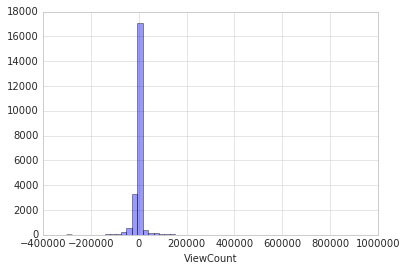

In [422]:
residuals = y_test['ViewCount'] - y_pred
sns.distplot(residuals, kde=False)

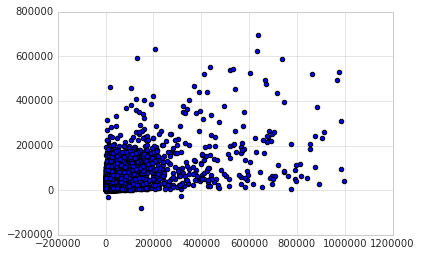

In [392]:
y_diff_predictions = np.array(np.array(xgb_diff.predict(X_test)) + np.array(X_test['PrevViewCount']))

plt.scatter(y_test['ViewCount'], y_diff_predictions)

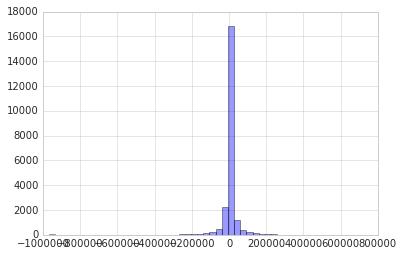

In [421]:
residuals = y_diff_predictions - np.array(y_test['ViewCount'])
sns.distplot(residuals, kde=False)

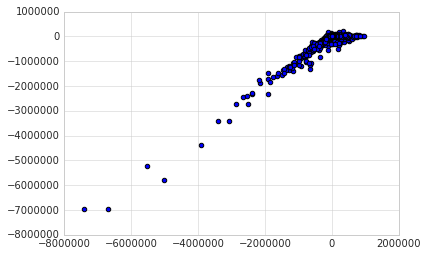

In [393]:
plt.scatter(y_test['Views-Difference'], xgb_diff.predict(X_test))

In [416]:
from sklearn.model_selection import cross_val_score

cv1 = cross_val_score(XGBRegressor(), X, y['ViewCount'], scoring='r2')
cv2 = cross_val_score(XGBRegressor(), X, y['Views-Difference'], scoring='r2')

print "{0} +- {1}".format(cv1.mean(), cv1.var())
print "{0} +- {1}".format(cv2.mean(), cv2.var())

0.340410453524 +- 0.00267493020376
0.884856037385 +- 0.000343019044269


In [423]:
cv1 = cross_val_score(XGBRegressor(), X, y['ViewCount'], scoring='neg_mean_squared_error')
cv1 = np.sqrt(-cv1)
cv2 =  cross_val_score(XGBRegressor(), X, y['Views-Difference'], scoring='neg_mean_squared_error')
cv2 = np.sqrt(-cv2)
print "{0} +- {1}".format(cv1.mean(), cv1.var())
print "{0} +- {1}".format(cv2.mean(), cv2.var())

43089.559937 +- 6364629.26183
53789.0716966 +- 162040067.702


We found out that R^2 is kind of useless because the RMSE of predicting differences is significantly higher than just predicting view count.